# Exponential Mechanism

## Libraries

In [2]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import laplace
from collections import Counter

## Contextualization

In [3]:
"""
-------------
| Dataset X |
----------------------------
| User         Income ($)  |
----------------------------
| Andrew       600         |
| Bob          690         |
| Carly        100         |
| Dean         130         |
| Ernest       400         |
| Florence     570         |
----------------------------

Assume the function F as a categorical query, where:

F = the user with the highest income

Then, F(X) = Bob

However, we must define a utility function U before being able to answer the query F
trough the Exponential Mechanism

Assume the utility function U:

U = length(user) * income

For clarity:
U(X, Andrew)   = 6 * 600 = 3600
U(X, Bob)      = 3 * 690 = 2070
U(X, Carly)    = 5 * 100 = 500
U(X, Dean)     = 4 * 130 = 520
U(X, Ernest)   = 6 * 400 = 2400
U(X, Florence) = 8 * 570 = 4560

Now, we must discover the sensitivity of the utility function

The neighboring Dataset Y can be generated either from:
    1. Dataset X added in another user such {Gary:income} or {Harry:income}
    2. Dataset X removed in one existing user such {Andrew:income} or {Bob:income}
    3. Dataset X modified in one existing user such {Andrew:income} to {Andrew:new_income} or
    {Andrew:income} to {Andy:income}

Since we do not have control over cases 1 and 3, we will consider only the case 2 for generating the neighboring datasets

Then, six possible neighbor datasets Y can be generated:
X - {Andrew}
X - {Bob}
...
And so on

The sensitivity Delta_U is reached when the user Florence is removed from the dataset X, thus:

Delta_U = 4560
"""

# Response of function F applied to dataset X
fx = "Bob"

# Array of users
users = ["Andrew", "Bob", "Carly", "Dean", "Ernest", "Florence"]

# Array of utility scores
scores = [3600, 2070, 500, 520, 2400, 4560]

# Sensitivity of the utility function U
delta_u = 4560

# Standard epsilon values in order of magnitude -- lower to higher
eps = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]

## Graphs

Sensitivity (Utility Function) = 4560

# of Samples = 100000

- Eps = 0.01

Probabilities = [0.16690876261270726, 0.16662898594844675, 0.16634238237434357, 0.1663460302736049, 0.16668929024117835, 0.16708454854971927]

Frequencies = Counter({'Ernest': 16782, 'Florence': 16748, 'Carly': 16722, 'Andrew': 16691, 'Dean': 16531, 'Bob': 16526})


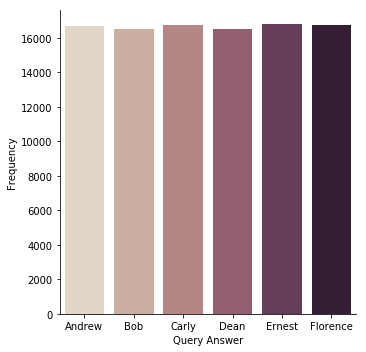

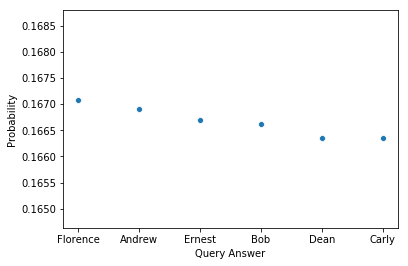


- Eps = 0.1

Probabilities = [0.16908326709696792, 0.1662703341129147, 0.1634325014990881, 0.16346834589010553, 0.16687305999067695, 0.1708724914102468]

Frequencies = Counter({'Florence': 17241, 'Ernest': 16801, 'Bob': 16758, 'Andrew': 16698, 'Dean': 16369, 'Carly': 16133})


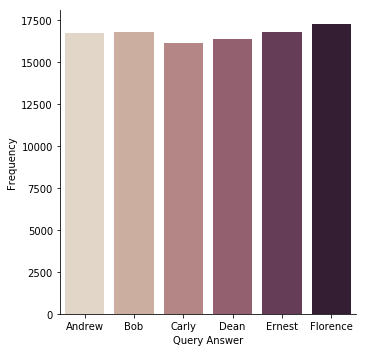

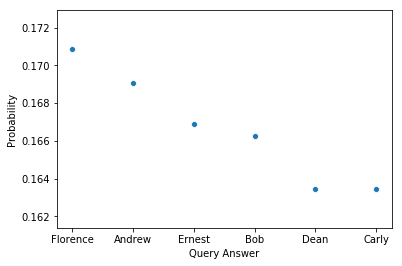


- Eps = 0.5

Probabilities = [0.17862761301975635, 0.1642552607412306, 0.15070844225180513, 0.15087378336770627, 0.16725402943095, 0.1882808711885516]

Frequencies = Counter({'Florence': 18836, 'Andrew': 17913, 'Ernest': 16710, 'Bob': 16202, 'Carly': 15257, 'Dean': 15082})


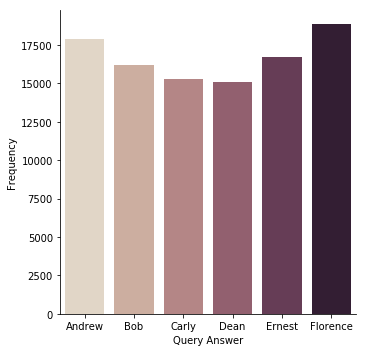

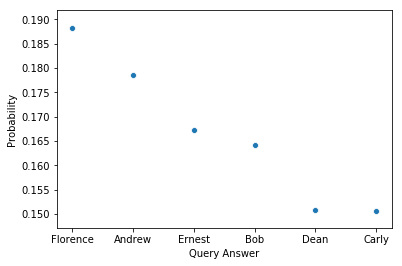


- Eps = 1.0

Probabilities = [0.1901684672526977, 0.1607977221896645, 0.13536814519363288, 0.13566533090358543, 0.16672260804114641, 0.21127772641927306]

Frequencies = Counter({'Florence': 21055, 'Andrew': 19109, 'Ernest': 16666, 'Bob': 15896, 'Carly': 13703, 'Dean': 13571})


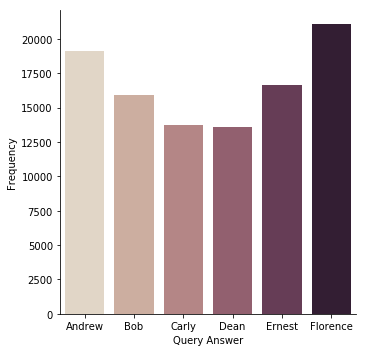

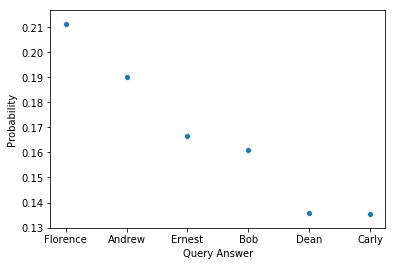


- Eps = 2.0

Probabilities = [0.21125798942014712, 0.15104136949733932, 0.10704566550728661, 0.1075161951491773, 0.16237722707524735, 0.26076155335080226]

Frequencies = Counter({'Florence': 26293, 'Andrew': 21045, 'Ernest': 16134, 'Bob': 15025, 'Carly': 10865, 'Dean': 10638})


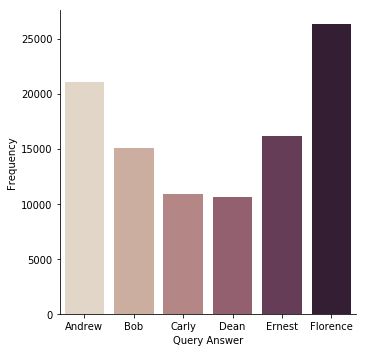

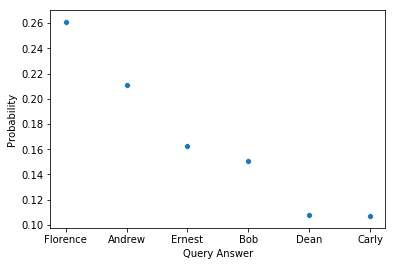


- Eps = 3.0

Probabilities = [0.22864992139107565, 0.1382277424664866, 0.08247170494942588, 0.08301607066892107, 0.15407742937430788, 0.31355713114978306]

Frequencies = Counter({'Florence': 31485, 'Andrew': 22801, 'Ernest': 15348, 'Bob': 13841, 'Dean': 8265, 'Carly': 8260})


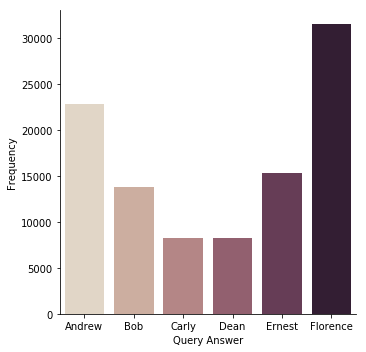

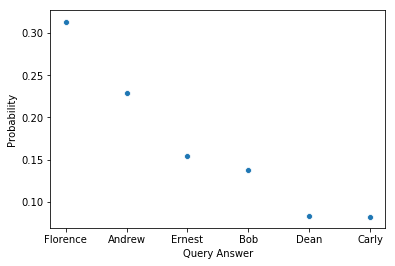

In [4]:
"""
In this example, we want to plot two types of graphs, histrograms and scatter plots

The histograms focus on displaying the outcomes frequency to check if they match with its
respective probabilities of occurrence

The scatter plots stand for displaying which distribution the probabilities of occurrence
of each outcome -- together -- looks like (we expect that it looks like the Exponential distribution)

We set an amount of 100000 samples to generate the histograms

Each histogram consumes a total budget (eps) of 100000 * actual_eps
"""

number_of_samples = 100000

print("Sensitivity (Utility Function) = {}\n\n# of Samples = {}".format(delta_u, number_of_samples))

for i_eps in eps:
    print("\n- Eps = {}".format(i_eps))
    
    probabilities = []

    for j_score in scores:
        probability = math.exp( (i_eps * j_score) / (2 * delta_u) )
        probabilities.append(probability)
    
    probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]
    
    samples = random.choices(population=users, weights=probabilities, k=number_of_samples)
    
    print("\nProbabilities = {}\n\nFrequencies = {}".format(probabilities, Counter(samples)))
    
    df = pd.DataFrame(samples)
    df.columns = ["samples"]

    sns.catplot(x="samples", kind="count", palette="ch:.25", data=df.sort_values("samples"))

    plt.xlabel("Query Answer")
    plt.ylabel("Frequency")
    plt.show()
    
    df = pd.DataFrame({"users":users, "probabilities":probabilities})
    
    sns.scatterplot(x="users", y="probabilities", data=df.sort_values("probabilities", ascending=False))
    
    plt.xlabel("Query Answer")
    plt.ylabel("Probability")
    plt.show()

## Naive Execution

In [5]:
"""
In this example we want to discover the individual with the highest income

Bear in mind that Bob is the individual which holds the highest income

From the outputs, we can observe that the utility function heavily impacts the mechanism's outcome
alongside the eps parameter

Although Bob holds the highest income, it holds the third lowest score

That is one of the reasons why Bob rarely shows up in the mechanism's outcomes
"""

print("Sensitivity (Utility Function) = {}".format(delta_u))

for i_eps in eps:
    print("\n- Eps = {}".format(i_eps))
    
    probabilities = []

    for j_score in scores:
        probability = math.exp( (i_eps * j_score) / (2 * delta_u) )
        probabilities.append(probability)
    
    probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]
    
    sample = random.choices(population=users, weights=probabilities, k=1)[0]
    
    print("\nF(X) = Bob\nAnonymized Query Answer F'(X) = {}".format(sample))

Sensitivity (Utility Function) = 4560

- Eps = 0.01

F(X) = Bob
Anonymized Query Answer F'(X) = Andrew

- Eps = 0.1

F(X) = Bob
Anonymized Query Answer F'(X) = Andrew

- Eps = 0.5

F(X) = Bob
Anonymized Query Answer F'(X) = Andrew

- Eps = 1.0

F(X) = Bob
Anonymized Query Answer F'(X) = Dean

- Eps = 2.0

F(X) = Bob
Anonymized Query Answer F'(X) = Florence

- Eps = 3.0

F(X) = Bob
Anonymized Query Answer F'(X) = Florence


## Composite Execution

In [6]:
"""
In this example we want to discover the top-k (0 < k <= 6) individuals with the highest incomes

Each mechanism's execution consumes a portion of the budget equals to total_eps/k

By the end of the execution, we have the top-k individuals with the highest income through a
total_eps-differentially private manner
"""

k = 3

total_eps = 6.0

eps_per_run = total_eps/k

print("K = {}\n\nTotal Budget (Eps) = {}\n\nBudget (Eps) Consumed Per Run = {}".format(k, total_eps, eps_per_run))

_users = users.copy()
_scores = scores.copy()

for i_run in range(k):
    print("\n- Execution {}\n".format(i_run+1))
    
    probabilities = []

    for j_score in _scores:
        probability = math.exp( (eps_per_run * j_score) / (2 * delta_u) )
        probabilities.append(probability)
    
    probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]
    
    sample = random.choices(population=_users, weights=probabilities, k=1)[0]
    
    print("Top Income = {}".format(sample))
    
    _scores.remove(_scores[_users.index(sample)])
    _users.remove(sample)


K = 3

Total Budget (Eps) = 6.0

Budget (Eps) Consumed Per Run = 2.0

- Execution 1

Top Income = Florence

- Execution 2

Top Income = Ernest

- Execution 3

Top Income = Bob
